In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import pairwise_distances, pairwise_distances_chunked
from scipy.sparse import vstack
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [13]:
total = pd.read_csv("Combined_Netflix_IMDb_Useful_Columns.csv", low_memory=False)

In [14]:
total.fillna("NAN",inplace=True)

In [15]:
total.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
def remove_spaces(lst):
    spaces_removed = []
    for name in lst:
        spaces_removed.append(name.replace(" ", ""))
    return spaces_removed

In [24]:
def list_for_remove(string):
    string=str(string)
    return " ".join(remove_spaces(string.split(", ")))

In [25]:
def clean_up(pd_df):
    #fill any NAN values
    pd_df =pd_df.copy()
    #remove spaces from actors and directors names
    pd_df.actors = pd_df.actors.apply(lambda x: list_for_remove(x))
    pd_df.director = pd_df.director.apply(lambda x: list_for_remove(x))
    pd_df.genre = pd_df.genre.apply(lambda x: list_for_remove(x))
    return pd_df

In [26]:
total = clean_up(total)

In [27]:
def get_keywords(pd_df):
    pd_df = pd_df.copy()
    pd_df.description = pd_df.description.apply(lambda x: make_keywords(x, dis=True))
    pd_df.original_title = pd_df.original_title.apply(lambda x: make_keywords(x))
    return pd_df

In [28]:
def make_keywords(string,dis=False):
#     if dis:
#         string=translated.translate(string)
    tokens = word_tokenize(string)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    if not dis:
        stop_words = set(stopwords.words(['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek','hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']))
    words = [w for w in words if not w in stop_words]
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(w) for w in words]
    return " ".join(words)

In [29]:
total = get_keywords(total)

In [30]:
total.to_csv('translated_in_case.csv')

In [175]:
bob = pd.read_csv('translated_in_case.csv', low_memory=False)

In [176]:
bob

,Unnamed: 0,title_id,type,original_title,director,actors,year,duration,genre,description
0,0,tt0000009,Movie,miss jerry,AlexanderBlack,BlancheBayliss WilliamCourtenay ChaunceyDepew,1894,45,Romance,adventure female reporter
1,1,tt0000574,Movie,story kelly gang,CharlesTait,ElizabethTait JohnTait NormanCampbell BellaCol...,1906,70,Biography Crime Drama,true story notorious australian outlaw ned kelly
2,2,tt0001892,Movie,sorte drøm,UrbanGad,AstaNielsen ValdemarPsilander GunnarHelsengree...,1911,53,Drama,two men high rank wooing beautiful famous eque...
3,3,tt0002101,Movie,cleopatra,CharlesL.Gaskill,HelenGardner PearlSindelar MissFielding MissRo...,1912,100,Drama History,fabled queen egypt affair roman general marc a...
4,4,tt0002130,Movie,linferno,FrancescoBertolini AdolfoPadovan,SalvatorePapa ArturoPirovano GiuseppedeLiguoro...,1911,68,Adventure Drama Fantasy,loosely adapted dante divine comedy inspired i...
...,...,...,...,...,...,...,...,...,...,...
93637,93637,s7783,Movie,zozo,JosefFares,ImadCreidi AntoinetteTurk EliasGergi CarmenLeb...,2005,99,Dramas InternationalMovies,lebanon civil war deprives zozo family left gr...
93638,93638,s7784,Movie,zubaan,MozezSingh,VickyKaushal Sarah-JaneDias RaaghavChanana Man...,2015,111,Dramas InternationalMovies Music&Musicals,scrappy poor boy worm way tycoon dysfunctional...
93639,93639,s7785,Movie,zulu japan,NAN,NastyC,2019,44,Documentaries InternationalMovies Music&Musicals,documentary south african rapper nasty c hit s...
93640,93640,s7786,TV Show,zumbo dessert,NAN,AdrianoZumbo RachelKhoo,2019,1 Season,InternationalTVShows RealityTV,dessert wizard adriano zumbo look next willy w...


In [54]:
total.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if pd_df.description[i] != 'NAN':
            descrip = pd_df.description[i] + " "
        if pd_df.actors[i] != 'NAN':
            act = (pd_df.actors[i] + " ") * 5
        if pd_df.director[i] != 'NAN':
            direct = (pd_df.director[i] + " ") * 10
        
        key = direct + " " + act + " " + descrip + " " + ((pd_df.original_title[i] + " ")*5) + pd_df.genre[i] + " " + pd_df.year[i]
        str_list.append(key)
    return str_list

In [51]:
#trans4?
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if pd_df.description[i] != 'NAN':
            descrip = (pd_df.description[i] + " ") * 3
        if pd_df.actors[i] != 'NAN':
            act = (pd_df.actors[i][0] + " ") * 6
            act = act + (pd_df.actors[i][1] + " ") * 5
            act = act + (pd_df.actors[i][2:] + " ") * 4
        if pd_df.director[i] != 'NAN':
            direct = (pd_df.director[i] + " ") * 7
        
        key = direct + " " + act + " " + descrip + " " + ((pd_df.original_title[i] + " ")*4) + ((pd_df.genre[i] + " ")*2) + pd_df.year[i]
        str_list.append(key)
    return str_list

In [50]:
#trans5
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if pd_df.description[i] != 'NAN':
            descrip = (pd_df.description[i] + " ") * 3
        if pd_df.actors[i] != 'NAN':
            act = (pd_df.actors[i][0] + " ") * 7
            act = act + (pd_df.actors[i][1] + " ") * 6
            act = act + (pd_df.actors[i][2:] + " ") * 5
        if pd_df.director[i] != 'NAN':
            direct = (pd_df.director[i] + " ") * 7
        key = direct + " " + act + " " + descrip + " " + ((pd_df.original_title[i] + " ")*5) + ((pd_df.genre[i] + " ")*3)
        str_list.append(key)
    return str_list

In [120]:
#trans6
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if pd_df.description[i] != 'NAN':
            descrip = (pd_df.description[i] + " ") * 3
        if pd_df.actors[i] != 'NAN':
            act = (pd_df.actors[i].split()[0] + " ") * 8
            if len(pd_df.actors[i].split())>2:
                act = act + (pd_df.actors[i].split()[1] + " ") * 6
            if len(pd_df.actors[i].split())>2:
                act = act + ((" ".join(pd_df.actors[i].split()[2:]) + " ") * 5)
        if pd_df.director[i] != 'NAN':
            direct = (pd_df.director[i] + " ") * 8
        key = direct + " " + act + " " + descrip + " " + ((pd_df.original_title[i] + " ")*5) + ((pd_df.genre[i] + " ")*3)
        str_list.append(key)
    return str_list

In [71]:
#plain mash no weight 
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if pd_df.description[i] != 'NAN':
            descrip = pd_df.description[i] + " "
        if pd_df.actors[i] != 'NAN':
            act = (pd_df.actors[i] + " ")
        if pd_df.director[i] != 'NAN':
            direct = (pd_df.director[i] + " ")
        
        key = direct + " " + act + " " + descrip + " " + ((pd_df.original_title[i] + " ")) + pd_df.genre[i] + " " + pd_df.year[i]
        str_list.append(key)
    return str_list

In [124]:
#trans7
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if 'NAN' not in pd_df.description[i]:# != 'NAN':
            descrip = (pd_df.description[i] + " ") * 3
        if 'NAN' not in pd_df.actors[i]:# != 'NAN':
            act = (pd_df.actors[i][0] + " ") * 8
            act = act + (pd_df.actors[i][1] + " ") * 6
            act = act + (" ".join(pd_df.actors[i][2:]) + " ") * 5
        if 'NAN' not in pd_df.director[i]:# != 'NAN':
            direct = (pd_df.director[i] + " ") * 6
        if 'NAN' not in pd_df.director[i]:# != 'NAN':
            direct = (pd_df.director[i] + " ") * 6
        key = direct + " " + act + " " + descrip + " " + ((pd_df.original_title[i] + " ")*5) + ((pd_df.genre[i] + " ")*3)
        str_list.append(key)
    return str_list

In [153]:
#trans12
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if 'NAN' not in pd_df.description[i]:# != 'NAN':
            descrip = (pd_df.description[i] + " ") * 3
        if 'NAN' not in pd_df.actors[i]:# != 'NAN':
            act = (pd_df.actors[i].split()[0] + " ") * 7
            if len(pd_df.actors[i].split())>2:
                act = act + (pd_df.actors[i].split()[1] + " ") * 5
            if len(pd_df.actors[i].split())>2:
                act = act + ((" ".join(pd_df.actors[i].split()[2:]) + " ") * 4)
        if 'NAN' not in pd_df.director[i]:# != 'NAN':
            direct = (pd_df.director[i] + " ") * 8
        if 'NAN' not in pd_df.original_title[i]:# != 'NAN':
            original = (pd_df.original_title[i] + " ") * 6
        key = direct + " " + act + " " + descrip + " " + original + ((pd_df.genre[i] + " ")*3)
        str_list.append(key)
    return str_list

In [158]:
#trans13
def mashup(pd_df):
    str_list = []
    key = ''
    direct = ' '
    act = ' '
    descrip = ' '
    for i in range(pd_df.shape[0]):
        if i not in pd_df.index:
            continue
        if 'NAN' not in pd_df.description[i]:# != 'NAN':
            descrip = (pd_df.description[i] + " ") * 3
        if 'NAN' not in pd_df.actors[i]:# != 'NAN':
            act = (pd_df.actors[i].split()[0] + " ") * 6
            if len(pd_df.actors[i].split())>2:
                act = act + (pd_df.actors[i].split()[1] + " ") * 5
            if len(pd_df.actors[i].split())>2:
                act = act + ((" ".join(pd_df.actors[i].split()[2:]) + " ") * 4)
        if 'NAN' not in pd_df.director[i]:# != 'NAN':
            direct = (pd_df.director[i] + " ") * 6
        if 'NAN' not in pd_df.original_title[i]:# != 'NAN':
            original = (pd_df.original_title[i] + " ") * 5
        key = direct + " " + act + " " + descrip + " " + original + ((pd_df.genre[i] + " ")*3)
        str_list.append(key)
    return str_list

In [159]:
total_lst = mashup(total)

In [123]:
if 'NAN' in total.actors[0]:
    print('NAN')

In [142]:
for val in total_lst:
    if "NAN" in val:
        print('yeah', val)

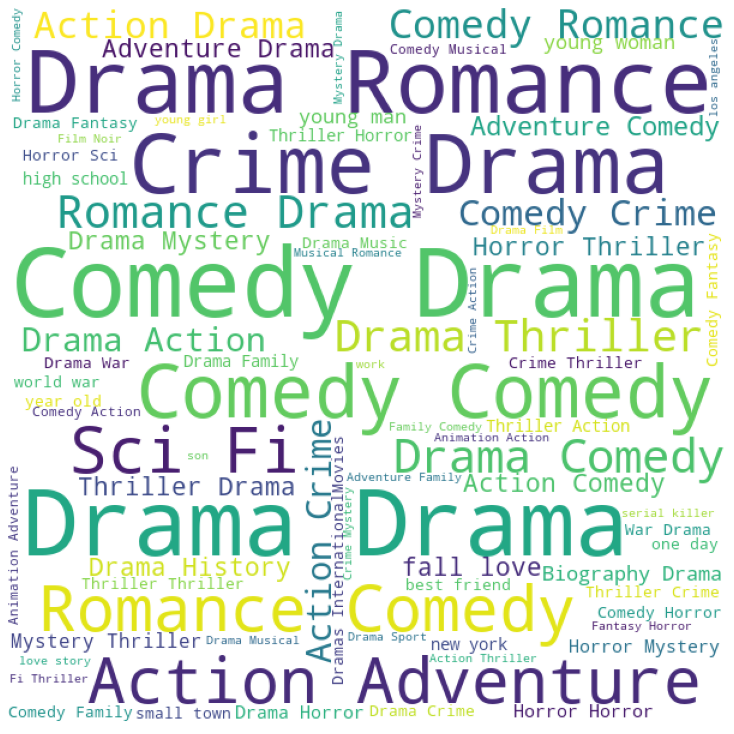

In [152]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width = 600, height = 600, 
				background_color ='white',  
				min_font_size = 10).generate(" ".join(total_lst)) 

# plot the WordCloud image					 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("pic.png")
plt.show() 

In [112]:
total = total.fillna("NAN")

In [18]:
total

,title_id,type,original_title,director,actors,year,duration,genre,description
0,tt0000009,Movie,miss jerry,AlexanderBlack,BlancheBayliss WilliamCourtenay ChaunceyDepew,1894,45,Romance,adventure female reporter
1,tt0000574,Movie,story kelly gang,CharlesTait,ElizabethTait JohnTait NormanCampbell BellaCol...,1906,70,Biography Crime Drama,true story notorious australian outlaw kelly
2,tt0001892,Movie,sorte drøm,UrbanGad,AstaNielsen ValdemarPsilander GunnarHelsengree...,1911,53,Drama,two high rank wooing beautiful famous equestri...
3,tt0002101,Movie,cleopatra,CharlesL.Gaskill,HelenGardner PearlSindelar MissFielding MissRo...,1912,100,Drama History,fabled queen egypt affair roman general marc a...
4,tt0002130,Movie,linferno,FrancescoBertolini AdolfoPadovan,SalvatorePapa ArturoPirovano GiuseppedeLiguoro...,1911,68,Adventure Drama Fantasy,loosely adapted dante divine comedy inspired i...
...,...,...,...,...,...,...,...,...,...
93637,s7783,Movie,zozo,JosefFares,ImadCreidi AntoinetteTurk EliasGergi CarmenLeb...,2005,99,Dramas InternationalMovies,lebanon civil deprives zozo family left grief ...
93638,s7784,Movie,zubaan,MozezSingh,VickyKaushal Sarah-JaneDias RaaghavChanana Man...,2015,111,Dramas InternationalMovies Music&Musicals,scrappy poor boy worm way tycoon dysfunctional...
93639,s7785,Movie,zulu japan,NAN,NastyC,2019,44,Documentaries InternationalMovies Music&Musicals,documentary south african rapper nasty hit sta...
93640,s7786,TV Show,zumbo dessert,NAN,AdrianoZumbo RachelKhoo,2019,1 Season,InternationalTVShows RealityTV,dessert wizard adriano zumbo look next willy w...


In [36]:
# (total.actors[i]+" ")*5

The Following Cells were for getting the total title list don't run again.

In [18]:
# for_list = pd.read_csv("Combined_Netflix_IMDb_Useful_Columns.csv", low_memory=False)

In [19]:
# title_list = for_list.original_title.to_list()

In [22]:
# for k, v in enumerate(title_list):
#     title_list[k] = v + " ("+for_list.year.iloc[k]+")"

In [25]:
# dbfile = open(f'all_title_list.pkl', 'ab')
# # source, destination
# pickle.dump(title_list, dbfile)                     
# dbfile.close()

In [22]:
# dbfile = open(f'all_title_list.pkl', 'rb')
# # source, destination
# title = pickle.load(dbfile)                     
# dbfile.close()

In [160]:
vectorizor = CountVectorizer()
keys = vectorizor.fit_transform(total_lst)

In [73]:
tfvec = TfidfVectorizer(ngram_range=(3, 3))
tfkey = tfvec.fit_transform(total_lst)

In [74]:
tfkey

<93642x2888088 sparse matrix of type '<class 'numpy.float64'>'
	with 3123289 stored elements in Compressed Sparse Row format>

In [161]:
dist = pairwise_distances_chunked(keys, metric='cosine')

In [163]:
dbfile = open(f'distance/translated4_weights_full_set1433.pkl', 'rb')
# dbfile = open(f'../distance/full_set{int(files)}.pkl', 'rb')
# dbfile = open(f'../chunks/imdb_test{int(files)}.pkl', 'rb')
# source, destination
pull = pickle.load(dbfile)                     
dbfile.close()

In [162]:
y=0
while (y < total.shape[0]):
    pull = next(dist)
    if y == 0:
        save = pull.shape[0]
    y += pull.shape[0]
    dbfile = open(f'distance/translated13_weights_full_set{y}.pkl', 'ab')
    # source, destination
    pickle.dump(pull, dbfile)                     
    dbfile.close()
save

1433

In [38]:
dbfile = open(f'offset.pkl', 'ab')
# source, destination
pickle.dump(save, dbfile)                     
dbfile.close()

In [27]:
lst = []
for val in total.duration:
    if len(val)<4:
        lst.append(int(val))
min(lst)

3

In [25]:
total[total.duration=='3']

,title_id,type,original_title,director,actors,year,duration,genre,description
91460,s5606,Movie,silent,LimbertFabian BrandonOldenburg,NAN,2014,3,Children&FamilyMovies Sci-Fi&Fantasy,silent animated short film created academy win...


In [1]:
from deep_translator import GoogleTranslator

In [6]:
translated = GoogleTranslator(source='auto', target='en')

In [7]:
translated.translate("Hola, mi amour")

'Hello my love'

In [10]:
total.description = total.description.apply(lambda x: translated.translate(x))

In [11]:
total.to_csv("translated_hopefully.csv")

In [3]:
translated = pd.read_csv("translated_hopefully.csv", low_memory=False)

In [5]:
translated_maybe = pd.read_csv('translated_in_case.csv', low_memory=False)

In [8]:
translated_maybe

,Unnamed: 0,title_id,type,original_title,director,actors,year,duration,genre,description
0,0,tt0000009,Movie,miss jerry,AlexanderBlack,BlancheBayliss WilliamCourtenay ChaunceyDepew,1894,45,Romance,adventure female reporter
1,1,tt0000574,Movie,story kelly gang,CharlesTait,ElizabethTait JohnTait NormanCampbell BellaCol...,1906,70,Biography Crime Drama,true story notorious australian outlaw ned kelly
2,2,tt0001892,Movie,sorte drøm,UrbanGad,AstaNielsen ValdemarPsilander GunnarHelsengree...,1911,53,Drama,two men high rank wooing beautiful famous eque...
3,3,tt0002101,Movie,cleopatra,CharlesL.Gaskill,HelenGardner PearlSindelar MissFielding MissRo...,1912,100,Drama History,fabled queen egypt affair roman general marc a...
4,4,tt0002130,Movie,linferno,FrancescoBertolini AdolfoPadovan,SalvatorePapa ArturoPirovano GiuseppedeLiguoro...,1911,68,Adventure Drama Fantasy,loosely adapted dante divine comedy inspired i...
...,...,...,...,...,...,...,...,...,...,...
93637,93637,s7783,Movie,zozo,JosefFares,ImadCreidi AntoinetteTurk EliasGergi CarmenLeb...,2005,99,Dramas InternationalMovies,lebanon civil war deprives zozo family left gr...
93638,93638,s7784,Movie,zubaan,MozezSingh,VickyKaushal Sarah-JaneDias RaaghavChanana Man...,2015,111,Dramas InternationalMovies Music&Musicals,scrappy poor boy worm way tycoon dysfunctional...
93639,93639,s7785,Movie,zulu japan,NAN,NastyC,2019,44,Documentaries InternationalMovies Music&Musicals,documentary south african rapper nasty c hit s...
93640,93640,s7786,TV Show,zumbo dessert,NAN,AdrianoZumbo RachelKhoo,2019,1 Season,InternationalTVShows RealityTV,dessert wizard adriano zumbo look next willy w...


In [17]:
total[total.original_title.str.contains(" Z ")]

,title_id,type,original_title,director,actors,year,duration,genre,description
7178,tt0044563,Movie,Down Among the Z Men,Maclean Rogers,"Harry Secombe, Michael Bentine, Spike Milligan...",1952,71,Comedy,"The cast of the popular radio program ""The Goo..."
46635,tt0435202,Movie,Kidô senshi Z Gandamu: Hoshi o tsugu mono,Yoshiyuki Tomino,"Toshio Furukawa, Tôru Furuya, Kazuhiko Inoue, ...",2004,94,"Animation, Action, Drama",10 years after the One Year War Camille Bidan ...
48093,tt0468812,Movie,Kidô senshi Z Gandamu II: Koibito tachi,Yoshiyuki Tomino,"Tôru Furuya, Marika Hayashi, Shûichi Ikeda, Ch...",2005,98,"Animation, Action, Drama",Camille falls in love with the unstable enemy ...
48991,tt0488584,Movie,Kidô senshi Z Gandamu III: Hoshi no kodô wa ai,Yoshiyuki Tomino,"Nobuo Tobita, Shûichi Ikeda, Yoshiko Sakakibar...",2006,99,"Animation, Action, Drama",NAN
65850,tt2263944,Movie,Dragon Ball Z: Doragon bôru Z - Kami to Kami,Masahiro Hosoda,"Masako Nozawa, Hiromi Tsuru, Ryô Horikawa, Mas...",2013,85,"Animation, Action, Adventure","The Z-Fighters must contend with Lord Beerus, ..."
68244,tt2657152,Movie,War Z Day One,Lana Titov,"Josh Butcher, Annakate Chappell, Mark Conlon, ...",2013,58,"Horror, Sci-Fi, Thriller",Peter is obsessed with apocalypses. He reads a...
72376,tt3718066,Movie,Captain Z & the Terror of Leviathan,Steve Rudzinski,"Zoltan Zilai, Madison Siple, Steve Rudzinski, ...",2014,80,Comedy,In 1714 Captain Zachariah Zicari stops a group...
72755,tt3819668,Movie,Dragon Ball Z: Doragon bôru Z - Fukkatsu no 'F',Tadayoshi Yamamuro,"Masako Nozawa, Ryô Horikawa, Hiromi Tsuru, Mas...",2015,93,"Animation, Action, Adventure","One peaceful day on Earth, two remnants of Fre..."
78202,tt5625152,Movie,Pojdi Z Mano,Igor Sterk,"Ivan Vastl, Mak Tepsic, Ronja Matijevec Jerman...",2016,83,"Adventure, Mystery, Thriller",In search of the best photo for the school com...
78985,tt5889204,Movie,Pokemon za mubi XY& Z 'borukenion to kiko (kar...,Kunihiko Yuyama,"Tyler Bunch, James Carter Cathcart, Daniel J. ...",2016,90,"Animation, Action, Adventure",A mystical Pokémon by the name of Volcanion mu...


In [9]:
test = pd.read_csv("Combined_Netflix_IMDb_Useful_Columns.csv", low_memory=False)

In [10]:
test

,Unnamed: 0,title_id,type,original_title,director,actors,year,duration,genre,description
0,0,tt0000009,Movie,Miss Jerry,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",1894,45,Romance,The adventures of a female reporter in the 1890s.
1,1,tt0000574,Movie,The Story of the Kelly Gang,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",1906,70,"Biography, Crime, Drama",True story of notorious Australian outlaw Ned ...
2,2,tt0001892,Movie,Den sorte drøm,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",1911,53,Drama,Two men of high rank are both wooing the beaut...
3,3,tt0002101,Movie,Cleopatra,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",1912,100,"Drama, History",The fabled queen of Egypt's affair with Roman ...
4,4,tt0002130,Movie,L'Inferno,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",1911,68,"Adventure, Drama, Fantasy",Loosely adapted from Dante's Divine Comedy and...
...,...,...,...,...,...,...,...,...,...,...
93637,93637,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",2005,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
93638,93638,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2015,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
93639,93639,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,2019,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
93640,93640,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",2019,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [22]:
total

,title_id,type,original_title,director,actors,year,duration,genre,description
0,tt0000009,Movie,Miss Jerry,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",1894,45,Romance,The adventures of a female reporter in the 1890s.
1,tt0000574,Movie,The Story of the Kelly Gang,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",1906,70,"Biography, Crime, Drama",True story of notorious Australian outlaw Ned ...
2,tt0001892,Movie,Den sorte drøm,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",1911,53,Drama,Two men of high rank are both wooing the beaut...
3,tt0002101,Movie,Cleopatra,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",1912,100,"Drama, History",The fabled queen of Egypt's affair with Roman ...
4,tt0002130,Movie,L'Inferno,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",1911,68,"Adventure, Drama, Fantasy",Loosely adapted from Dante's Divine Comedy and...
...,...,...,...,...,...,...,...,...,...
93637,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",2005,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
93638,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2015,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
93639,s7785,Movie,Zulu Man in Japan,NAN,Nasty C,2019,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
93640,s7786,TV Show,Zumbo's Just Desserts,NAN,"Adriano Zumbo, Rachel Khoo",2019,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [10]:
top_ten = total.iloc[recommends][(total.iloc[recommends].genre.str.contains(genre))].original_title[0:3].values

In [8]:
recommends=[0,23,86732]

In [76]:
test[total.title_id == 's4826']

,Unnamed: 0,title_id,type,original_title,director,actors,year,duration,genre,description
90680,90680,s4826,Movie,Perú: Tesoro escondido,Luis Ara,NaN,2017,76,"Documentaries, International Movies",It's a country steeped in cultural traditions ...


In [9]:
genre = ''

In [11]:
ids = total.iloc[recommends][(total.iloc[recommends].genre.str.contains(genre))].title_id[0:3].values

In [19]:
    new_ids=[]
    for m_id, title in zip(ids,top_ten):
        if m_id[0]=='s':
            # _, imdb_id = get_imdb_link(imdb_movies[imdb_movies.title_id==id].original_title)
            print(m_id, title)
            _, imdb_id = get_imdb_link(title)
            new_ids.append(imdb_id)
        else:
            new_ids.append(m_id)
    ids = new_ids  

s878 Beyond the Boundary: ICC Women's T20 World Cup Australia 2020


In [25]:
from urllib.parse import urlencode, urlparse, parse_qs
from lxml.html import fromstring
from requests import get
import time

In [12]:
def get_imdb_link(x):
    if x[0]=='t':
        return x
    title = total[total.title_id==x].original_title.values[0]
    title = "+".join(title.split())
    title = title + "+" + (total[total.title_id==x].type) + "+" + (total[total.title_id==x].year)
    raw = get(f"https://www.google.com/search?q=imdb+{title}").text
#     print(title, lst[1].split('/')[0])
    lst = raw.split("https://www.imdb.com/title/")
    link = "https://www.imdb.com/title/" + lst[1].split('/')[0]
    print(title, lst[1].split('/')[0])
    time.sleep(5)
    return lst[1].split('/')[0]

In [32]:
86732

86732

In [33]:
total

,title_id,type,original_title,director,actors,year,duration,genre,description
0,tt0000009,Movie,Miss Jerry,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",1894,45,Romance,The adventures of a female reporter in the 1890s.
1,tt0000574,Movie,The Story of the Kelly Gang,Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",1906,70,"Biography, Crime, Drama",True story of notorious Australian outlaw Ned ...
2,tt0001892,Movie,Den sorte drøm,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",1911,53,Drama,Two men of high rank are both wooing the beaut...
3,tt0002101,Movie,Cleopatra,Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",1912,100,"Drama, History",The fabled queen of Egypt's affair with Roman ...
4,tt0002130,Movie,L'Inferno,"Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",1911,68,"Adventure, Drama, Fantasy",Loosely adapted from Dante's Divine Comedy and...
...,...,...,...,...,...,...,...,...,...
93637,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",2005,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
93638,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2015,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
93639,s7785,Movie,Zulu Man in Japan,NAN,Nasty C,2019,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
93640,s7786,TV Show,Zumbo's Just Desserts,NAN,"Adriano Zumbo, Rachel Khoo",2019,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [13]:
total.title_id = total.title_id.apply(lambda x: get_imdb_link(x))

85855    3%+TV Show+2020
dtype: object tt4474344
85856    7:19+Movie+2016
dtype: object tt5979312
85857    23:59+Movie+2011
dtype: object tt2100376
85858    9+Movie+2009
dtype: object tt0472033
85859    21+Movie+2008
dtype: object tt0478087
85860    46+TV Show+2016
dtype: object tt5606154
85861    122+Movie+2019
dtype: object tt7867670
85862    187+Movie+1997
dtype: object tt0118531
85863    706+Movie+2019
dtype: object tt9390026
85864    1920+Movie+2008
dtype: object tt1301698
85865    1922+Movie+2017
dtype: object tt6214928
85866    1983+TV Show+2018
dtype: object tt7371666
85867    1994+TV Show+2019
dtype: object tt8736278
85868    2,215+Movie+2018
dtype: object tt8891536
85869    3022+Movie+2019
dtype: object tt9465600
85870    Oct-01+Movie+2014
dtype: object tt2267998
85871    Feb-09+TV Show+2018
dtype: object tt7335184
85872    22-Jul+Movie+2018
dtype: object tt7280898
85873    15-Aug+Movie+2019
dtype: object tt9817300
85874    '89+Movie+2017
dtype: object tt7614404
85875    ​​Ku

IndexError: list index out of range

In [16]:
 total[total.title_id=='s878'].original_title.values[0]

"Beyond the Boundary: ICC Women's T20 World Cup Australia 2020"

In [11]:
total.iloc[85855]

Unnamed: 0                                                    85855
title_id                                                         s1
type                                                        TV Show
original_title                                                   3%
director                                                        NAN
actors            João Miguel, Bianca Comparato, Michel Gomes, R...
year                                                           2020
duration                                                  4 Seasons
genre             International TV Shows, TV Dramas, TV Sci-Fi &...
description       In a future where the elite inhabit an island ...
Name: 85855, dtype: object

In [ ]:
https://www.netflix.com/search?q

In [30]:
def get_netflix_link(title):
    raw = get(f"https://www.netflix.com/search?q={title}").text
#     print(title, lst[1].split('/')[0])
    lst = raw.split("https://www.netflix.com/title/")
    link = "https://www.netflix.com//title/" + lst[1].split('?')[0]
    print(title, lst[1].split('/')[0])
    time.sleep(5)
    return lst[1].split('/')[0]

In [18]:
names = total[total.index>85854].original_title.values

In [19]:
names

array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object)

In [22]:
title = names[0]

In [32]:
f"https://www.netflix.com/search?q={title}"

'https://www.netflix.com/search?q=3%'

In [31]:
get_netflix_link(title)

IndexError: list index out of range

In [27]:
raw = get(f"https://www.netflix.com/search?q={title}").text

In [29]:
raw.split("https://www.netflix.com/")

['<!doctype html><html lang="en"><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="origin-trial" data-feature="EME Extension - Policy Check" data-expires="2018-11-26" content="Aob+++752GiUzm1RNSIkM9TINnQDxTlxz02v8hFJK/uGO2hmXnJqH8c/ZpI05b2nLsHDhGO3Ce2zXJUFQmO7jA4AAAB1eyJvcmlnaW4iOiJodHRwczovL25ldGZsaXguY29tOjQ0MyIsImZlYXR1cmUiOiJFbmNyeXB0ZWRNZWRpYUhkY3BQb2xpY3lDaGVjayIsImV4cGlyeSI6MTU0MzI0MzQyNCwiaXNTdWJkb21haW4iOnRydWV9"/><title>Netflix</title><link rel="preload" href="https://codex.nflxext.com/%5E3.0.0/truthBundle/webui/1.22.5-shakti-js-vc904eb79/js/js/bootstrap.js,common%7Cbootstrap.js/2/0b3f022T2L34052I2Z3e070l003g2Y3a2W392N2_310a013b0N/bck/true/none" as="script"/><link rel="preload" href="https://codex.nflxext.com/%5E3.0.0/truthBundle/webui/1.22.5-shakti-js-vc904eb79/js/js/components%7Clogin%7CloginControllerClient.js/2/0b3f022T2L34052I2Z3e070l003g2Y3a2W392N2_310a